Before we get started: 
1) install these jupyter lab extentions

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager keplergl-jupyter
!jupyter nbextension install --py --sys-prefix keplergl
!jupyter nbextension enable keplergl --py --sys-prefix

In [ ]:
!pip install keplergl

2. Now close out of your browser and restart Anaconda / deactivate your environment
3. Restart your environment

# Learning goals
After this week's lesson you should be able to:
- Style a map in geopandas
- Add multiple layers onto a map
- Create a map with a basemap using contextily
- Create an interactive map using geopandas and kepler
- Perform a spatial join (Refresher)

This week's lessons are adapted from:
- [The Geopandas user guide](https://geopandas.org/en/stable/docs/user_guide.html)
- [The contextily user guide](https://contextily.readthedocs.io/en/latest/index.html)
- [kepler.gl for Jupyter User Guide](https://docs.kepler.gl/docs/keplergl-jupyter)

In [1]:
# We are going to start importing the libraries we need
# all in one cell. 
# It is a good practice to keep all the imports in one cell so that
# we can easily see what libraries we are using in the notebook.
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt

%matplotlib inline
# we use the inline backend to generate the plots within the browser

os.getcwd()

'/Users/wenfeixu/Documents/GITHUB/4680_5680_intro_uds/Week4'

## 0. Read in the data
We are going to map the 2020 population density in NYC at the block group level. I've created a `GeoJSON` called `blkgrp_acs.geojson` from the [NHGIS](data2.nhgis.org) data portal. You can also download it [here](https://www.dropbox.com/s/p6vtkmvjzfrt66p/blkgrp_acs.geojson?dl=0).

In [2]:
blkgrp_acs = gpd.read_file('blkgrp_acs.geojson')

Note here that we have a column named `pop_density`. We'll just be using this in this example.

In [3]:
blkgrp_acs.head()

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G36000500001001      36      005  000100        1  360050001001   
1  G36000500002001      36      005  000200        1  360050002001   
2  G36000500002002      36      005  000200        2  360050002002   
3  G36000500002003      36      005  000200        3  360050002003   
4  G36000500004001      36      005  000400        1  360050004001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Block Group 1  G5030        S  1677210.0     0.0  +40.7911136   
1  Block Group 1  G5030        S    89013.0     0.0  +40.8139633   
2  Block Group 2  G5030        S   195476.0     0.0  +40.8113967   
3  Block Group 3  G5030        S   168343.0     0.0  +40.8081797   
4  Block Group 1  G5030        S    62874.0     0.0  +40.8139792   

       INTPTLON   Shape_Leng    Shape_Area  population        COUNTY  \
0  -073.8826858  5337.031119  1.677210e+06        3772  Bronx County   
1  -073.8608664  1253.660382  8.901347e+04        1330  Bronx County   
2  -073.8600538  3862.477414  1.954764e+05        2057  Bronx County   
3  -073.8566781  2031.524509  1.683456e+05        1392  Bronx County   
4  -073.8573467  1451.109087  6.287329e+04        1047  Bronx County   

   pop_density  ln_pop_density  \
0     0.001288       -6.654806   
1     0.008550       -4.761816   
2     0.006022       -5.112321   
3     0.004732       -5.353312   
4     0.009529       -4.653400   

                                            geometry  
0  POLYGON ((-73.88683 40.79804, -73.88384 40.795...  
1  POLYGON ((-73.85772 40.81336, -73.85821 40.813...  
2  POLYGON ((-73.85772 40.81336, -73.85716 40.812...  
3  POLYGON ((-73.85562 40.81061, -73.85546 40.809...  
4  POLYGON ((-73.85562 40.81061, -73.85613 40.811...

# 1. Static Maps in Geopandas 
This should mostly feel like a refresher as we've indirectly covered some of these tools. I will present it more systematically today. 

## 1.1 Plotting
When working with a geodataframe in geopandas, we have a function called `.plot()` that is using a library called `matplotlib` under the hood. 

<AxesSubplot:>

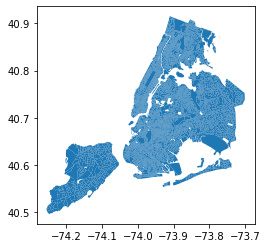

In [4]:
blkgrp_acs.plot()

#### Small Detour: Reading Documentation
Here are all the possible parameters that we can include in the `.plot()` function. The following cell is a snapshot from the [geopandas documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) that tell us a bit more about what the function does. 

Let's take a look at the first one: 
- This tells us that we can specify a parameter called `column`, that takes as input a `str` type. 
- What does this mean? This means that if we expand our code to be something like `gdf.plot(column='my_col_name')`, the values from the `my_col_name` column in my geodataframe will be used to color the plot. 
- In our example, since we are interested in `pop_density`, we might want to plot this, like so: 
    - `blkgrp_acs.plot(column='pop_density')`
- You may also have seen this version: `blkgrp_acs.plot('pop_density')`
    - This is a shorthand way to write `blkgrp_acs.plot(column='pop_density')`. Python knows that, when we don't specify the parameter, the first input in a function corresponds to the first parameter, the second input to the second paramter, and so on.
- We can also see that, by default, this input is `None`, meaning there is no value in `column` by default.

</figure>
<img src="https://www.dropbox.com/s/z6nezt2u3payzmj/Screen%20Shot%202023-02-11%20at%201.14.07%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>


Let's move on to the fourth input - **color**. The documentation stays that this takes a `str` as an input and 
>"If specified, all objects will be colored uniformly."

<AxesSubplot:>

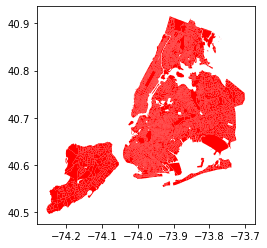

In [5]:
blkgrp_acs.plot(color='red')

Since we know we want to look at the column `pop_density` let's go ahead and set our `column` input to be `pop_density`.

<AxesSubplot:>

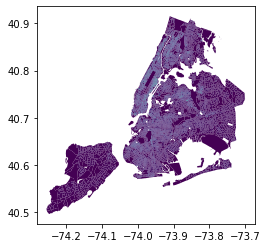

In [6]:
blkgrp_acs.plot(column='pop_density')
# This is not very informative because the default color scheme give us no idea of the range of values.

## 1.2 Changing the figure size of a plot
We can also see that there is an input called **figsize**. The documentation says: 
- This takes as an input a "tuple of integers", which is  `(number1,number2)`. Remember that a tuple is anything separated by parentheses, typically only with two elements (hence the word). 
- What this controls is "Size of the resulting matplotlib.figure.Figure. If the argument axes is given explicitly, figsize is ignored.".


<AxesSubplot:>

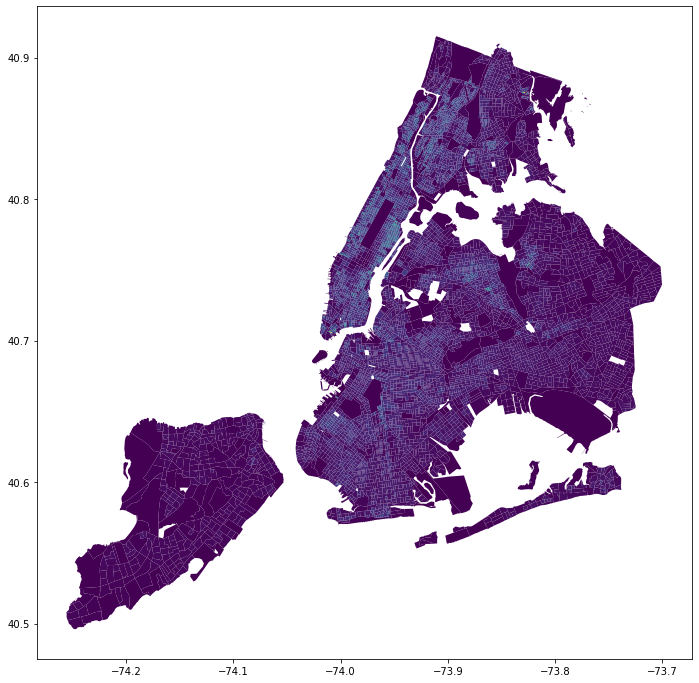

In [7]:
# At least now we can see those tiny block groups a little better.. 
# There is some variation in the population density, but it is still hard to tell what the range is.
blkgrp_acs.plot(column='pop_density',
                figsize=(12,12))

## 1.3 Adding a legend
To help us understand what values these colors are mapping to, let's introduce a legend. 

<AxesSubplot:>

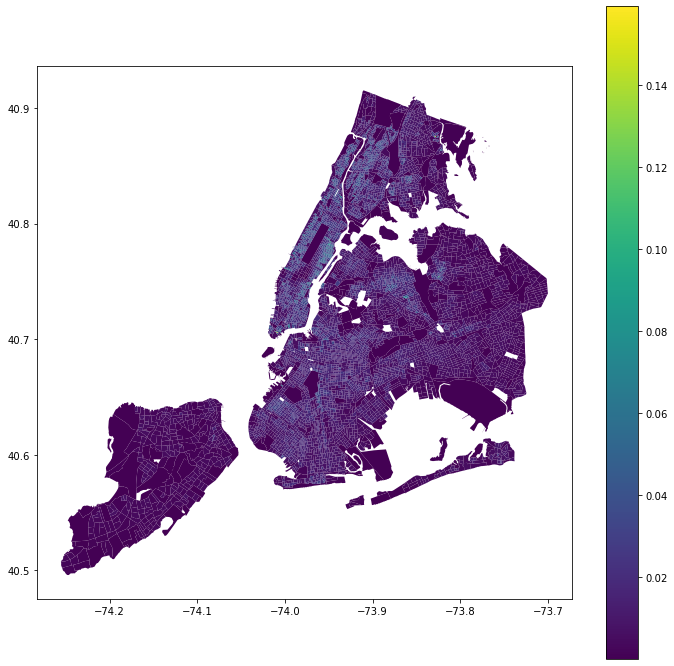

In [8]:
## The legend automatically shows the range of values in the data.
blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True)

## 1.4 Schemes 
By default geopandas uses an equal interval classification scheme. This means that the range of values (where range is the max_val - min_val) is divided equally. The scheme above has the colors continuous along this interval. (Typically, we use a classification scheme based on **k** distinct categories.)

Notice that we have the input option **scheme**. The documentation says that this takes a `str` input type, which is
>"Name of a choropleth classification scheme (requires mapclassify). A mapclassify.MapClassifier object will be used under the hood. Supported are all schemes provided by mapclassify (e.g. ‘BoxPlot’, ‘EqualInterval’, ‘FisherJenks’, ‘FisherJenksSampled’, ‘HeadTailBreaks’, ‘JenksCaspall’, ‘JenksCaspallForced’, ‘JenksCaspallSampled’, ‘MaxP’, ‘MaximumBreaks’, ‘NaturalBreaks’, ‘Quantiles’, ‘Percentiles’, ‘StdMean’, ‘UserDefined’). Arguments can be passed in classification_kwds."

### 1.4.1 Quantiles
Instead of the default equal interval scheme, let's try a quantiles scheme `Quantiles`. This will separate my data into 5 parts with the same number of values so that 20% of the data is below the first quantile, 20% is between the first and second quantile, and so on.

Now we have more variation in the colors. 

<AxesSubplot:>

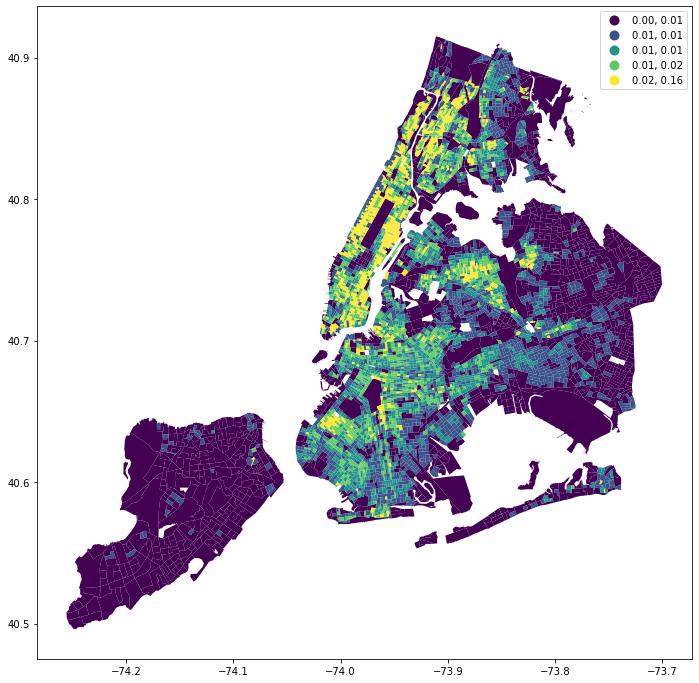

In [9]:
## Notice that the legend now gives us a range of values for each color.
## The values have been rounded to the nearest two significant digits.
## That is why some of the ranges are the same.
blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True,
                scheme= 'Quantiles')

### 1.4.2 Natural breaks
Another common classification scheme is **natural breaks**, which is (from the [ESRI GIS dictionary](https://support.esri.com/en-us/gis-dictionary/natural-breaks-classification#:~:text=%5Bcartography%5D%20A%20method%20of%20manual,the%20low%20points%20of%20valleys.)): 
>A method of manual data classification that seeks to partition data into classes based on natural groups in the data distribution. Natural breaks occur in the histogram at the low points of valleys. Breaks are assigned in the order of the size of the valleys, with the largest valley being assigned the first natural break.

<AxesSubplot:>

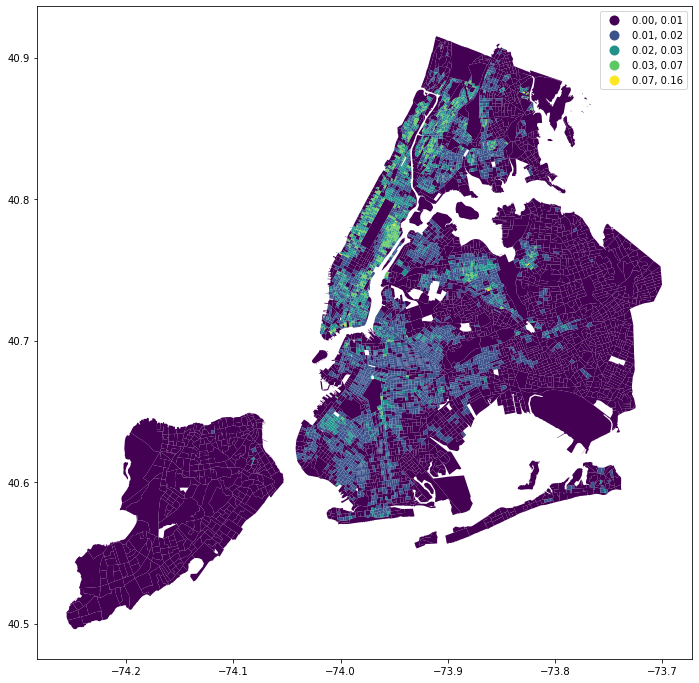

In [12]:
blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True,
                scheme= 'NaturalBreaks')

### 1.4.3 Boxplot


<AxesSubplot:>

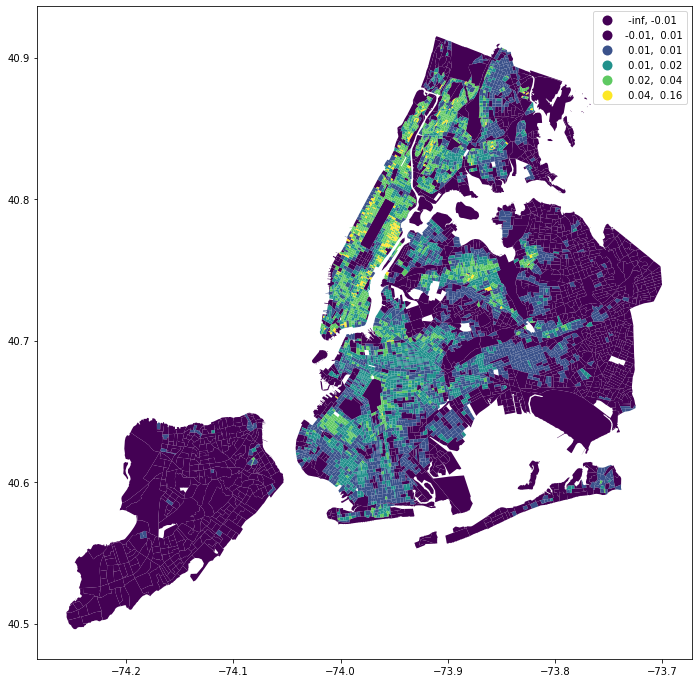

In [13]:
blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True,
                scheme= 'BoxPlot')

## 1.5 Legend `legend_kws` 

Notice that we have two types of legends: 
- **Binned**
- **Continuous**

The following are some legend tools but some only apply to either binned or continuous legends. 

Because geopandas is using matplotlib under the hood, but does not expose all the optionalities of matplotlib, you will often see optional inputs like `something_kws` (kws = keywords) that allow us to access those features with this. 

Here, let's try using `legend_kws`, which takes in a `dict` input format with 
>Keyword arguments to pass to matplotlib.pyplot.legend() or matplotlib.pyplot.colorbar(). 

Notice here that `legend_kws`. You can read the `matplotlib.pyplot.legend()` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend) to get a better sense of all the possible ways to format the legend, but let's go over a few keys ones: 

### 1.5.1 Location of Legend (binned): 


<AxesSubplot:>

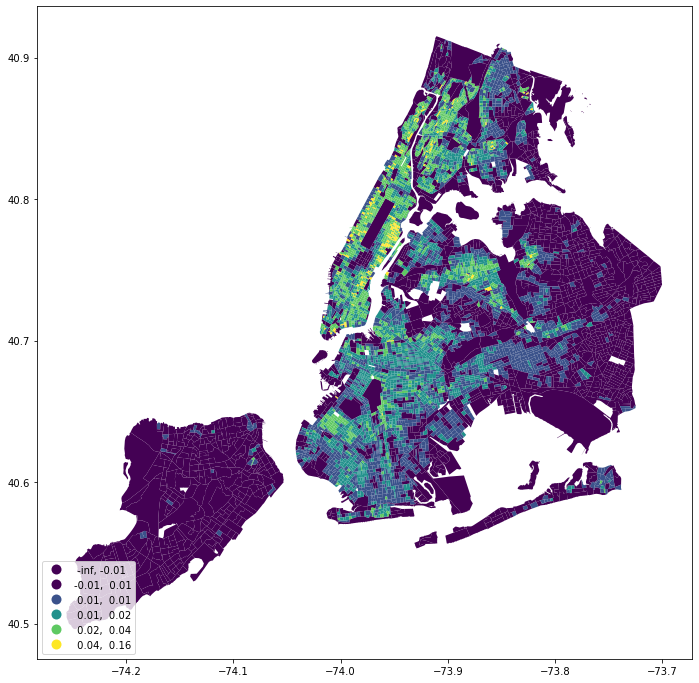

In [20]:
blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True,
                scheme= 'BoxPlot',
                legend_kwds={'loc': 'lower left'})

<AxesSubplot:>

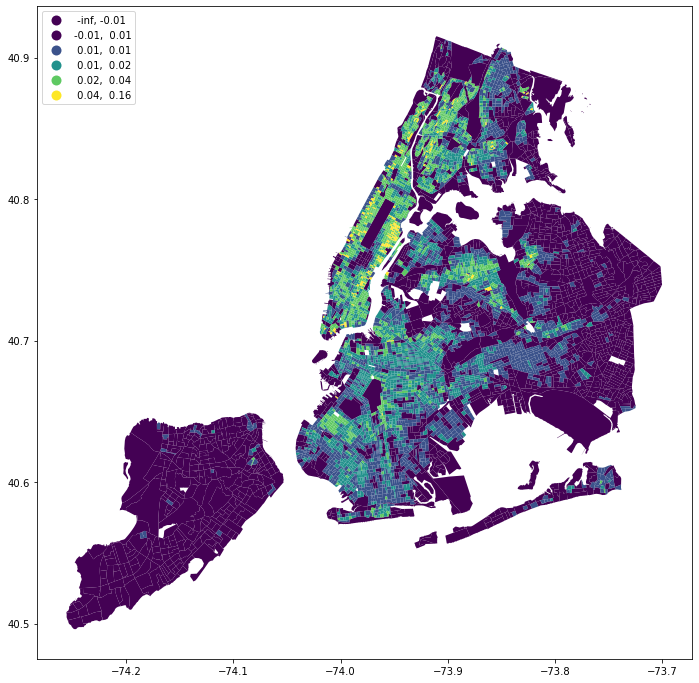

In [21]:
blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True,
                scheme= 'BoxPlot',
                legend_kwds={'loc': 'upper left'})

### 1.5.2 Orientation (continuous)
For continuous legends, we can't change the location of the legend, but we can use the key, `orientation`. 

<AxesSubplot:>

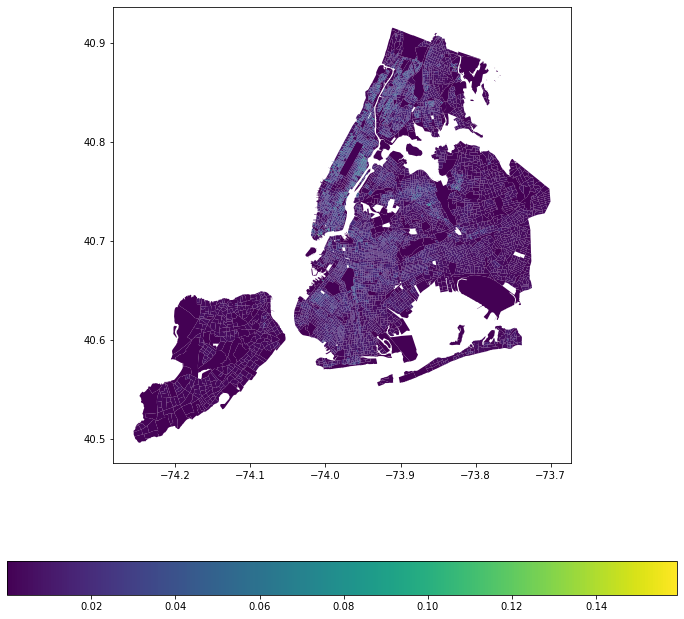

In [22]:
blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True,
                legend_kwds={'orientation':'horizontal'})

### 1.5.3 Sizing a legend (continuous)
If you are as bothered by the size the continuous legend as I am, here are to code snippets for fixing that. (I'm not going to explain what they're doing here. )

Vertical legend

<AxesSubplot:>

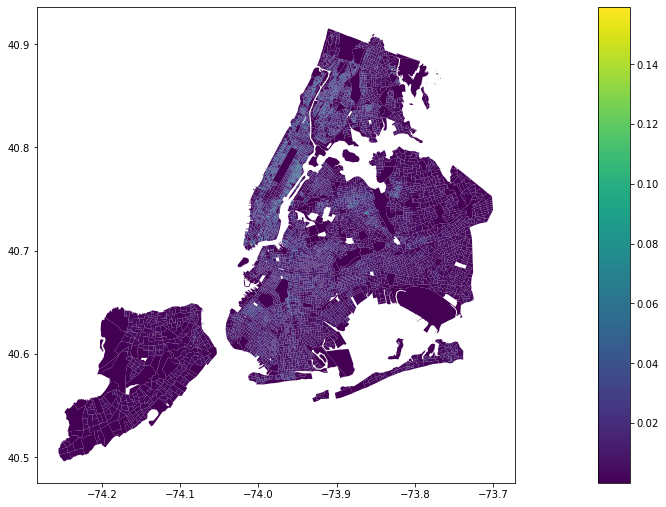

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1,figsize=(12,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

blkgrp_acs.plot(column='pop_density',
                ax=ax,
                cax=cax,
                legend=True,
                )

## 1.6 Colors

From the [matplotlib documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.html), here is are some of the named color schemes: 


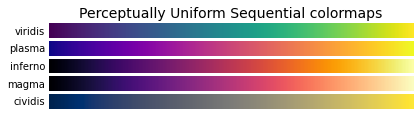

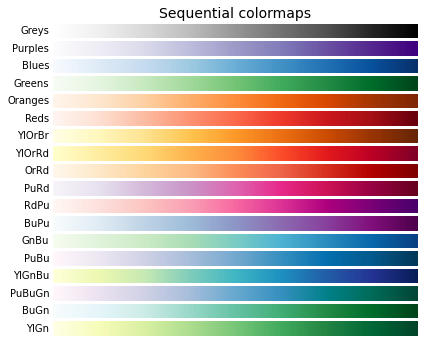

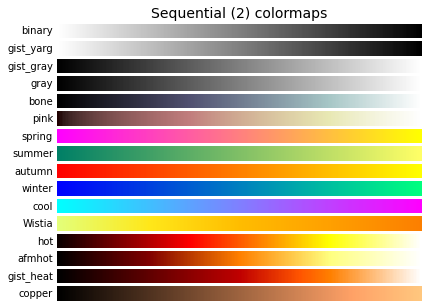

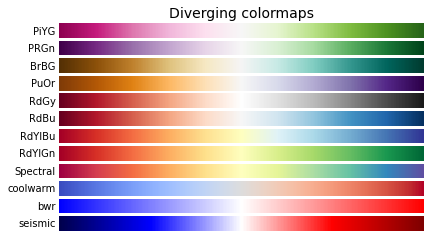

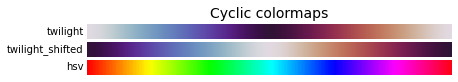

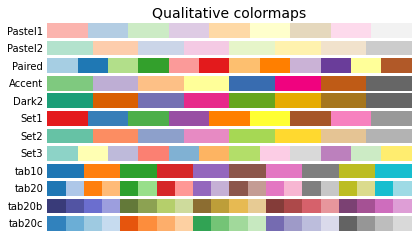

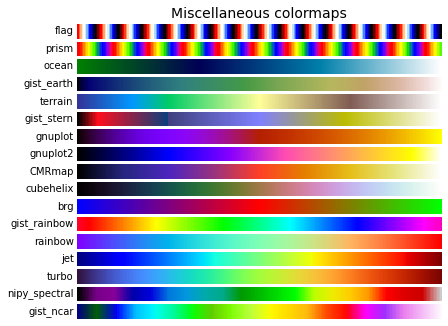

In [24]:
import numpy as np
import matplotlib.pyplot as plt

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

<AxesSubplot:>

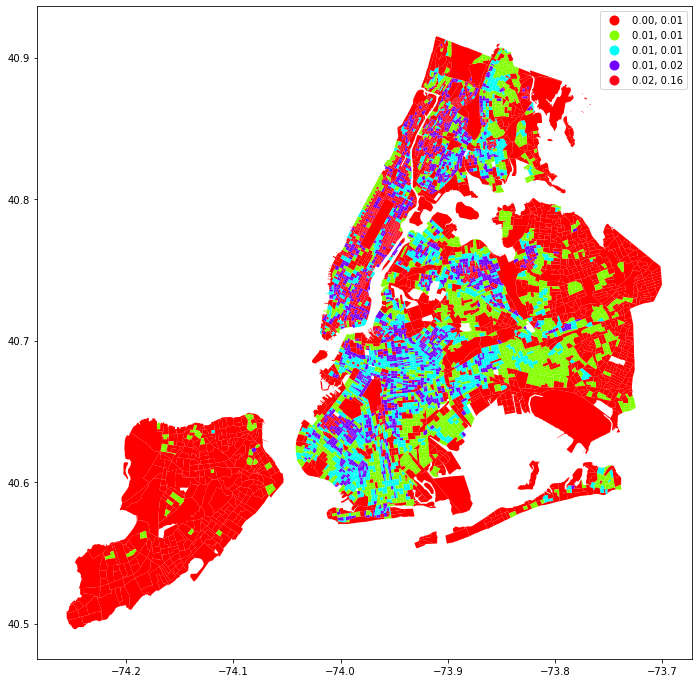

In [29]:
blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True,
                scheme= 'Quantiles',
                cmap='hsv')

## Q.1 (2pts)
Would you use a diverging colormap to make a choropleth for population density? Why or why not? Please answer in markdown text in the new cell below this one. 

# 2. Maps with multiple layers

## 2.1 Download Open Space data

Download the [2014 Planimetric Survey - Open Space](https://data.cityofnewyork.us/Recreation/2014-Planimetric-Survey-Open-Space-Parks-/g84h-jbjm) datsaset. Either Shapefile or GeoJSON are fine. 

## Q.2 Change projections (2pts)
Check the CRS of the Open Space data and, if it's not the same as `blkgrp_acs`, change it match `blkgrp_acs`. 

In [ ]:
## insert your code here. 

In [30]:
openspace = gpd.read_file('2014 Planimetric Survey - Open Space (Parks).geojson')

In [32]:
openspace.head()

shape_area system            landuse     shape_leng parknum  \
0  41539.8013629   None     Community Park  829.420106841    B021   
1  21960.4949197   None  Neighborhood Park  607.555193338    B222   
2  28079.0762647   None  Neighborhood Park   784.42199003    B326   
3  438416.114511   None     Community Park  2672.71014961    B021   
4   14465.699799   None     Triangle/Plaza  1376.10639843  B223DG   

                    park_name feat_code     status sub_code    source_id  \
0        Commodore Barry Park      4910    Updated   491050  21491000001   
1       Pierrepont Playground      4980  Unchanged   498000  21498000002   
2            Cobble Hill Park      4980  Unchanged   498000  21498000003   
3        Commodore Barry Park      4980  Unchanged   498000  21498000004   
4  Brooklyn Heights Promenade      4980  Unchanged   498000  21498000005   

                                            geometry  
0  MULTIPOLYGON (((-73.97922 40.69800, -73.97925 ...  
1  MULTIPOLYGON (((-73.99732 40.69601, -73.99732 ...  
2  MULTIPOLYGON (((-73.99557 40.68793, -73.99557 ...  
3  MULTIPOLYGON (((-73.97747 40.69651, -73.97746 ...  
4  MULTIPOLYGON (((-73.99747 40.69692, -73.99766 ...

## 2.2 Method 1
The first method to map multiple layers is to assign your plot to a variable, and then then assign the subsequent layer axes object to this. 

<AxesSubplot:>

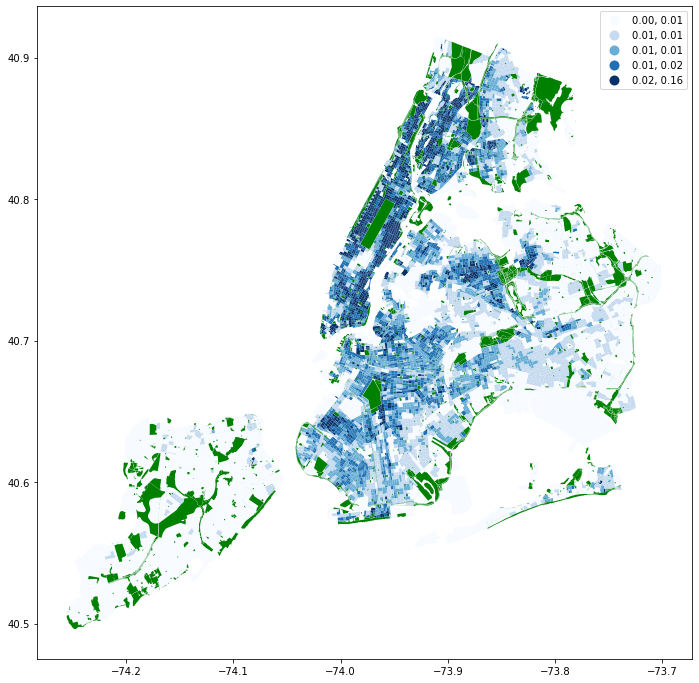

In [36]:
## Step 1
base = blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True,
                scheme= 'Quantiles',
                cmap='Blues')


openspace.plot(ax = base,color='green')

Note: If you try to plot multiple legends, without more complex manipulations, the plot will only show the legend from the last layer to be plotted. 

<AxesSubplot:>

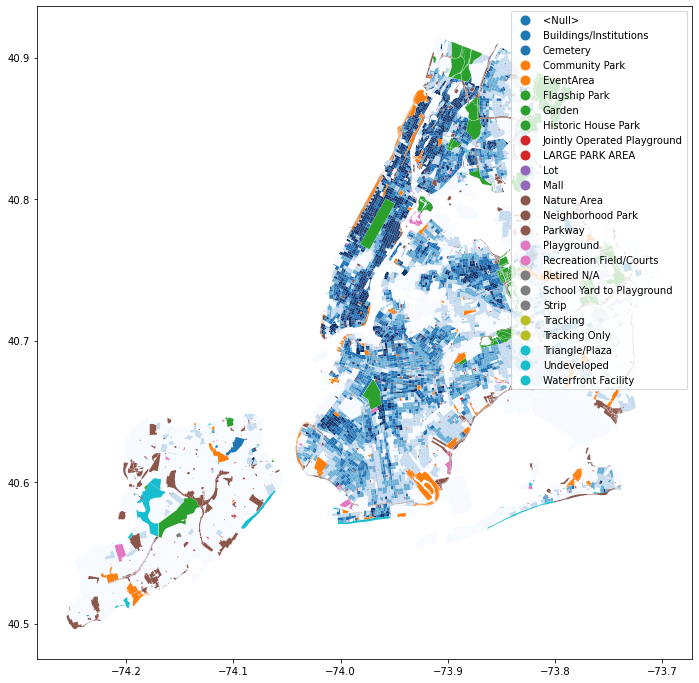

In [37]:
base = blkgrp_acs.plot(column='pop_density',
                figsize=(12,12),
                legend=True,
                scheme= 'Quantiles',
                cmap='Blues')
openspace.plot(ax = base,column='landuse',legend=True)

## 2.3 Method 2
The second, and generally more preferred, method is to use the 
`fig,ax = plt.subplots()` construction you've seen before. 


<AxesSubplot:>

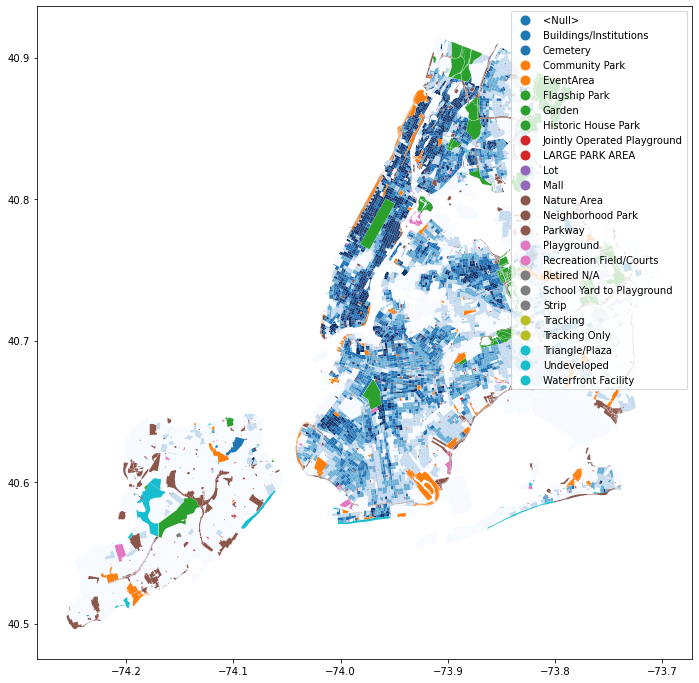

In [42]:
## The values in subplots are (numer of rows, numer of columns,figsize)
fig1,ax1 = plt.subplots(1,1,figsize=(12,12))

blkgrp_acs.plot(column='pop_density',
                ax=ax1,
                legend=True,
                scheme= 'Quantiles',
                cmap='Blues')

openspace.plot(ax = ax1,column='landuse',legend=True)

## 2.4 Plotting in a grid
The values in subplots are (number of rows, number of columns,figsize). So `plt.subplots(x,y)` will create a figure of x number of rows and y number of columns. 

As an example, here I've made a figure (`fig`) with 4 rows and 5 columns of empty axes (`ax`)

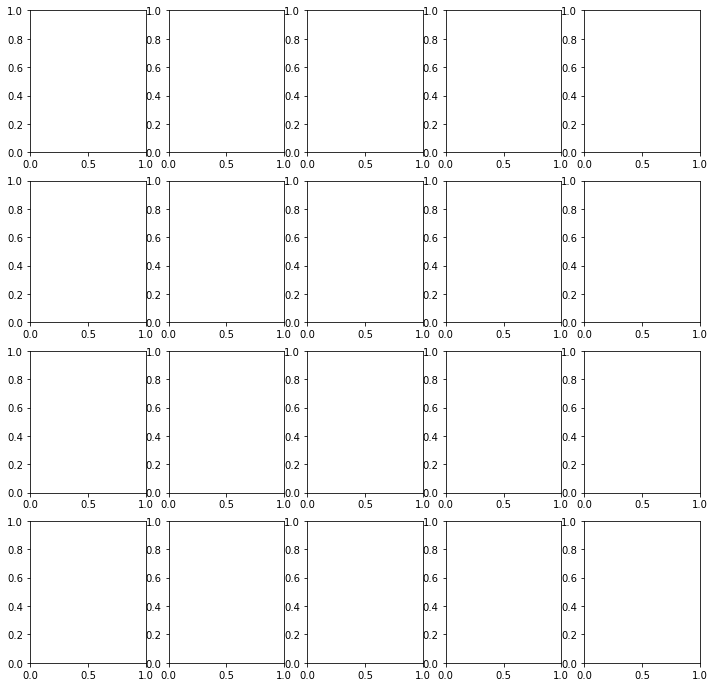

In [43]:
fig,ax = plt.subplots(4,5,figsize = (12,12))

Notice that `ax` is an array of subplots.. 

In [48]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [44]:
ax.shape

(4, 5)

In [45]:
## This allows me to access the second row and second column axes object. 
ax[1,1]

<AxesSubplot:>

We can then assign a chart to each axes object

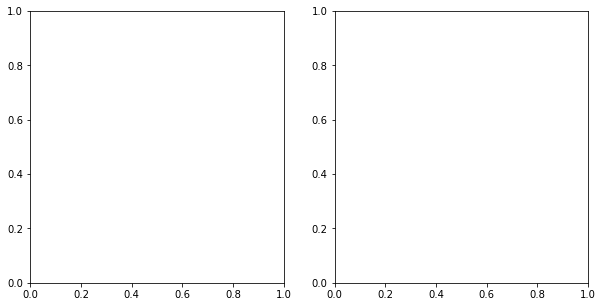

In [46]:
## The values in subplots are (numer of rows, numer of columns,figsize)
fig1,ax1 = plt.subplots(1,2,figsize=(10,5))

In [47]:
ax1

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

<AxesSubplot:>

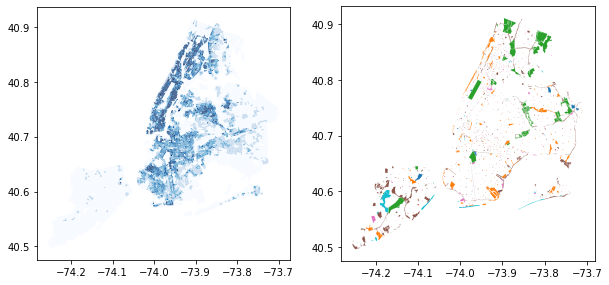

In [49]:
## The values in subplots are (numer of rows, numer of columns,figsize)
fig1,ax1 = plt.subplots(1,2,figsize=(10,5))

blkgrp_acs.plot(column='pop_density',
                ax=ax1[0],
                scheme= 'Quantiles',
                cmap='Blues')

openspace.plot(ax = ax1[1],column='landuse')

# 3. Contextily 
`contextily` is library that allows us to grab basemap tiles from different map providers. 

In [50]:
import contextily as cx

## 3.1 A basic basemap
`contextily` also uses the matplotlib axes method. 

We just have to assign our geopandas plot to a variable name. 

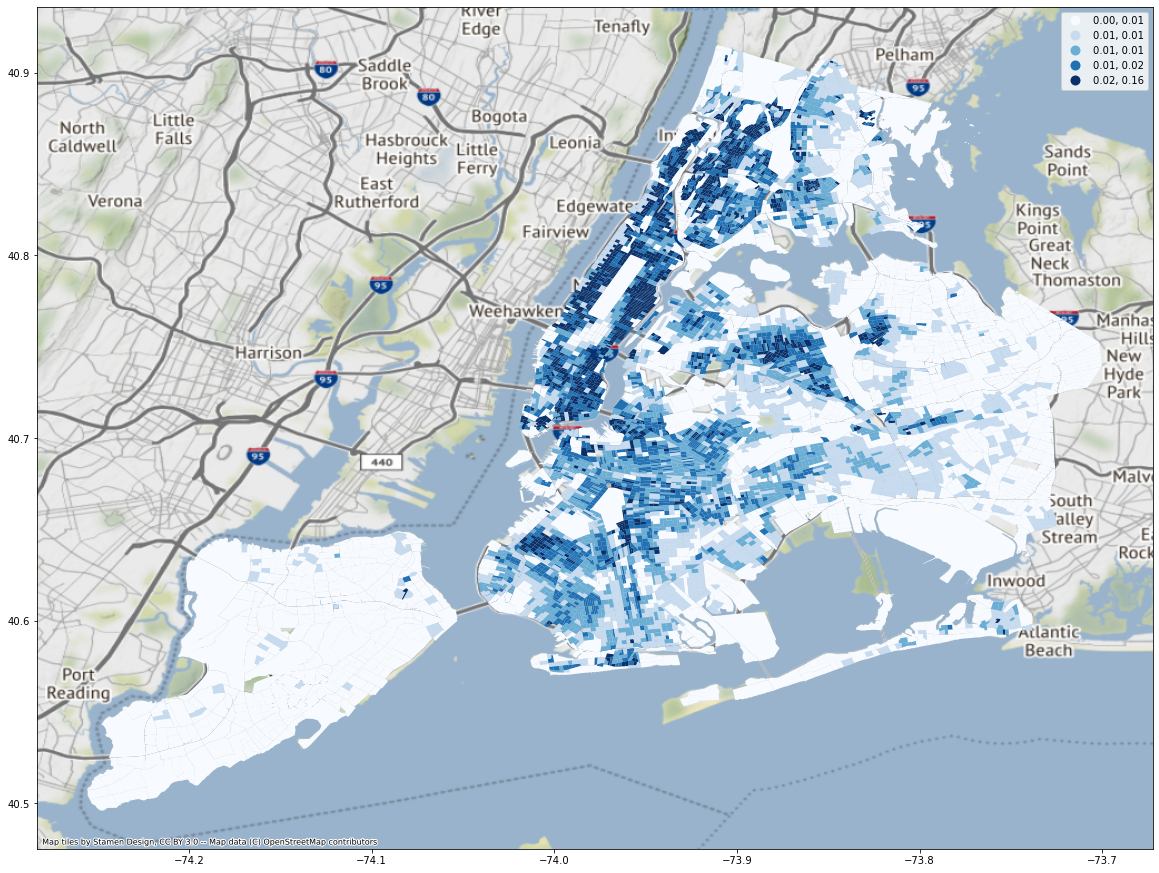

In [51]:
data_ax = blkgrp_acs.plot(column='pop_density',
                scheme= 'Quantiles',
                figsize=(20, 20), 
                legend=True,
                cmap='Blues')

cx.add_basemap(ax = data_ax,
               crs=blkgrp_acs.crs)

#### Changing CRS
I don't love how `EPSG:4326` looks so I will create a version of my datasets in `EPSG:3857`.

In [52]:
blkgrp_acs_3857 = blkgrp_acs.to_crs(epsg=3857)

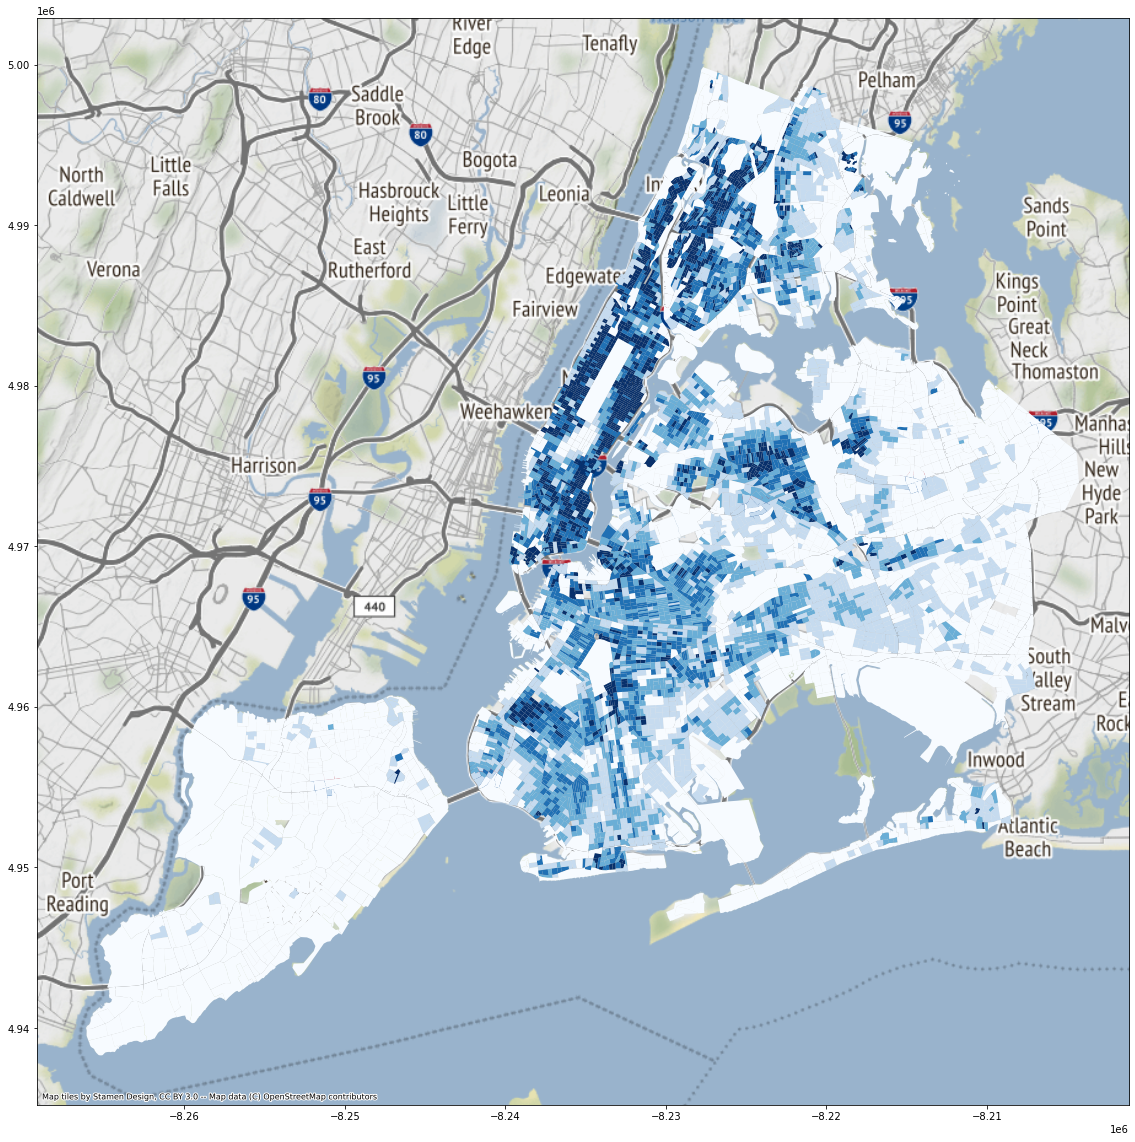

In [53]:
data_ax = blkgrp_acs_3857.plot(column='pop_density',
                scheme= 'Quantiles',
                figsize=(20, 20),          
                cmap='Blues')
cx.add_basemap(ax = data_ax,
               crs=blkgrp_acs_3857.crs)


## 3.2 Changing the basemap.
There are a lot of different basemaps from different providers, which you can see [here](https://contextily.readthedocs.io/en/latest/intro_guide.html). 

Here are just a few that are 

In [ ]:
selection = ['OpenStreetMap.Mapnik',
             'OpenTopoMap',
             'Stamen.Toner',
             'Stamen.TonerLite',
             'Stamen.Terrain',
             'Stamen.TerrainBackground',
             'Stamen.Watercolor',
             'NASAGIBS.ViirsEarthAtNight2012',
             'CartoDB.Positron',
             'CartoDB.Voyager',
             'CartoDB.DarkMatter'
            ]

In order to change the basemap, you add `source` to the `cx.add_basemap()` functoin. 

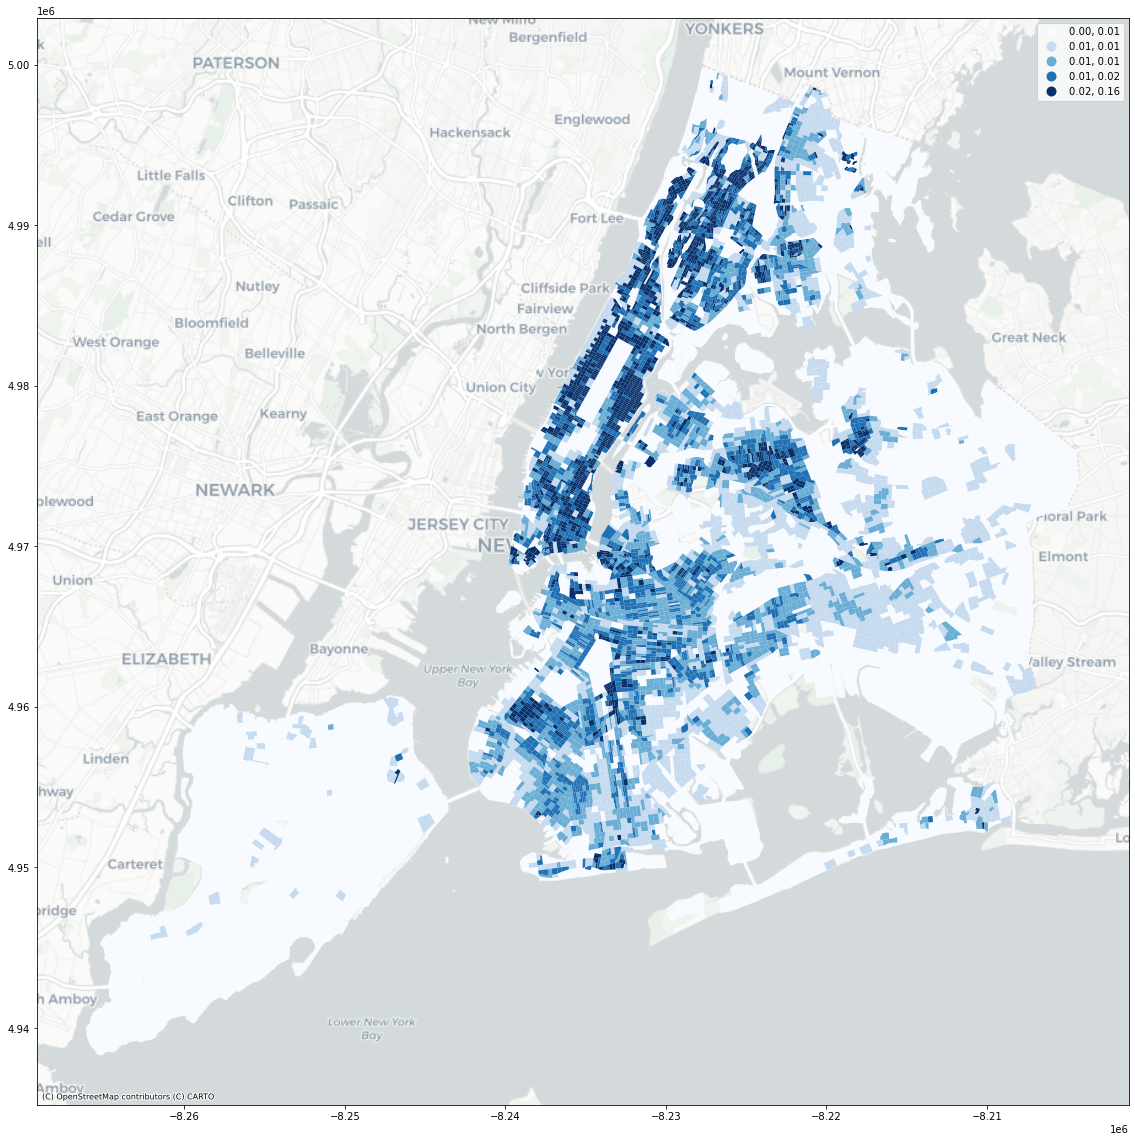

In [54]:
data_ax = blkgrp_acs_3857.plot(column='pop_density',
                               scheme= 'Quantiles',
                               figsize=(20, 20),
                               legend=True,
                               cmap='Blues')
cx.add_basemap(ax = data_ax,
               crs=blkgrp_acs_3857.crs,
               source = cx.providers.CartoDB.Positron
              )


# 4. Kepler
Kepler.gl is a powerful open-source geospatial analysis tool that allows you to visualize and explore large-scale geolocation data. In this tutorial, we'll go through the steps to create a map with Kepler.gl in a Jupyter Notebook environment.


## 4.1 Create a map object

In [55]:
## The code should work, but 
## I am getting an "Error displaying widget: model not found"
from keplergl import KeplerGl
map_1 = KeplerGl(height=400)
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

You should get an interactive tool, without a basemap, like this: 
</figure>
<img src="https://www.dropbox.com/s/xu1gcfvxqpblbbn/Screen%20Shot%202023-02-11%20at%206.37.08%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>


In [58]:
map_1.save_to_html()

Map saved to keplergl_map.html!


This will create an empty web map in your directory called `keplergl_map.html`

In [57]:
map_1.add_data(data=blkgrp_acs,
               name="Census")

You should now see a copy of your ACS data up above: 
</figure>
<img src="https://www.dropbox.com/s/34apb5gnko2y0sk/Screen%20Shot%202023-02-11%20at%207.36.56%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>


- Click on the arrow button on the top left hand corner. 
- A tool bar should open that allows you to style the data 
- Explore styling the map. 

Now save your map tool

In [ ]:
map_1.save_to_html(file_name='acs_population_density.html')

You can open up this file as a `.html` page on your browser. I've saved down a copy in this repo so you can see what it looks like. 